In [19]:

import numpy as np # linear algebra
import pandas as pd #data processing, csv file (e.g. pd.readcsv)
import seaborn as sns
import matplotlib.pyplot as plt


Loading the Dataset & EDA


In [7]:
data=pd.read_csv('/Users/macbookair/Documents/Python Projects/medical_insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Distribution of Categorical Variables

In [10]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of ", feature)
    print(data[feature].value_counts())
    print("\n")

Distribution of  sex
sex
male      1406
female    1366
Name: count, dtype: int64


Distribution of  smoker
smoker
no     2208
yes     564
Name: count, dtype: int64


Distribution of  region
region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64




Distribution of Charges


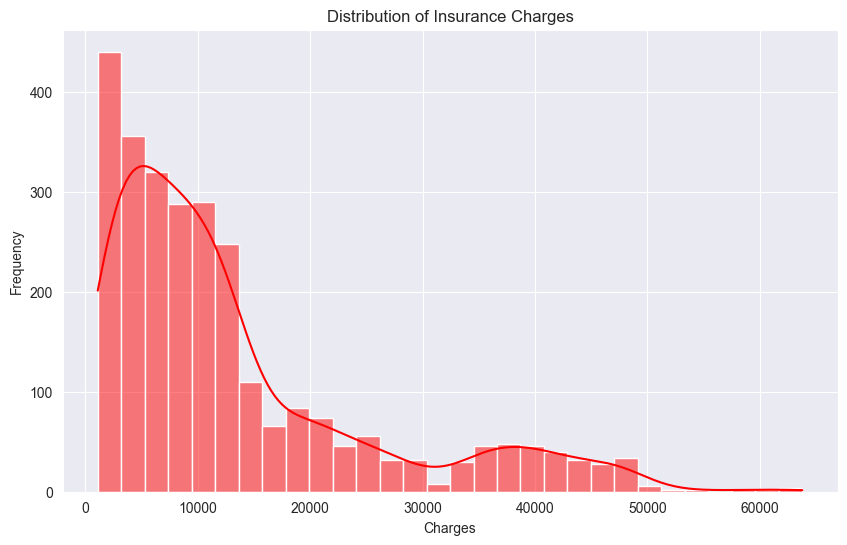

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True, bins=30, color='red')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


Boxplot to Visualize Charges by Region

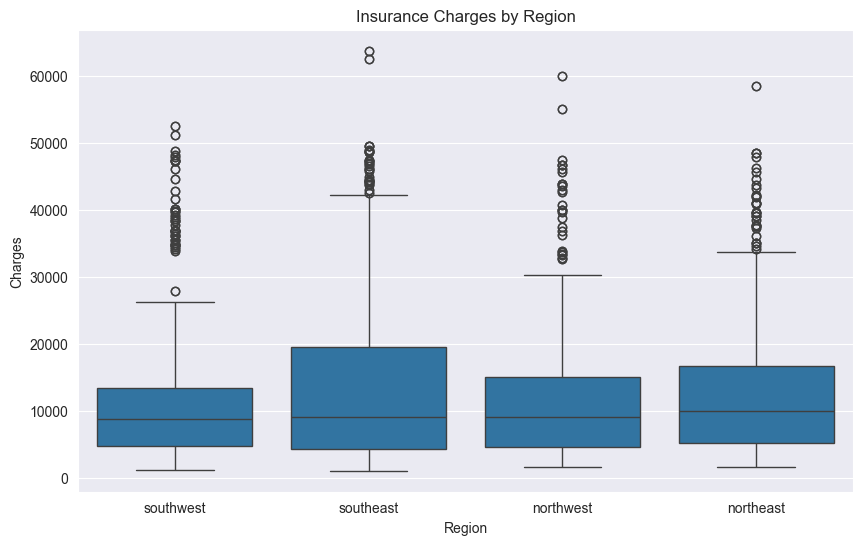

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

Boxplot to Visualize Charges by Smoking Status

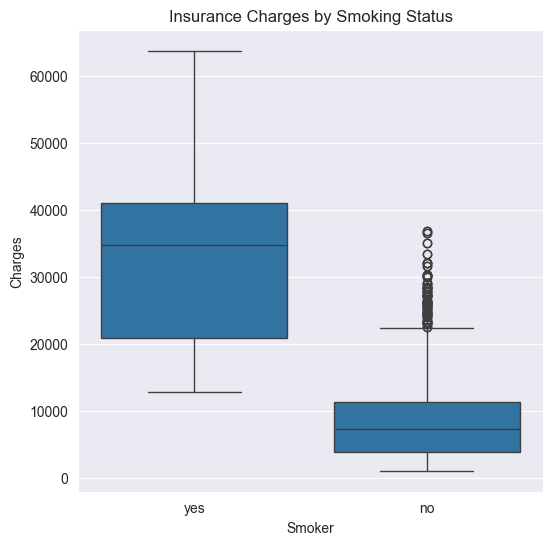

In [13]:

plt.figure(figsize=(6, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


Encode Categorical Variables ("sex", "smoker", & "region") to Numerical Values (and make this change permanent)


In [14]:
#using the ML library to convert categorical variables into numerical form
from sklearn.preprocessing import LabelEncoder 

#make a copy of the original dataframe to preserve it
data_encoded = data.copy()

#initialize LabelEncoder
label_encoder = LabelEncoder()

#Encode 'sex', 'smoker', & 'region' columns
data_encoded['sex'] = label_encoder.fit_transform(data['sex'])
data_encoded['smoker'] = label_encoder.fit_transform(data['smoker'])
data_encoded['region'] = label_encoder.fit_transform(data['region'])

#display the first few rows of the encoded dataframe
print("Encoded dataframe:")
print(data_encoded.head())
print("\n")
# now the changes are permanent in the 'data_encoded' dataframe


Encoded dataframe:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520




In [15]:
#to make the changes permanent in the original dataframe 'data' do the following:
data[['sex','smoker','region']] = data_encoded[['sex', 'smoker', 'region']]

Correlation Matrix

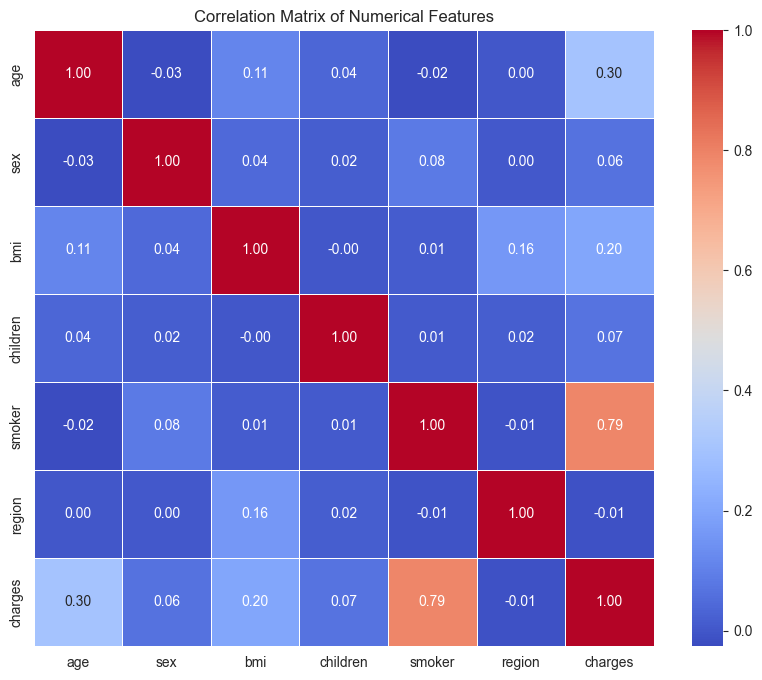

In [16]:

#compute the correlation matrix
correlation_matrix = data.corr()

#plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Summary of Statistics of the Data with Encoded Variables

In [17]:

data.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.507215,30.701349,1.101732,0.203463,1.532468,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.103467,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4687.797000
50%,39.000000,1.000000,30.447500,1.000000,0.000000,2.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,0.000000,2.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Building a Linear Regression Model to Create Predictive Models 


In [21]:
#linear regression assumes there is a linear relationship between the dependent variable and one or more independent variables 
#sensitive to outliers but simple to understand and implement with easy-to interpret results

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [22]:
#Separate features (X) and target variable (Y)
X = data.drop('charges', axis=1)
y = data['charges']

#Split the dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()

#Initialize and train the Linear Regression model 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Make predictions on the Test set (20%)
lr_predictions = lr_model.predict(X_test) #these will be compared to the y_test values 

#Compute the Mean Squared Error (MSE) of the Linear Regression Model 
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Mean Squared Error (Linear Regression):", lr_mse)


Mean Squared Error (Linear Regression): 39922479.35435013


Building a Decision Tree Regressor to Create Predictive Models

Mean Squared Error (Decision Tree): 8658302.858462535


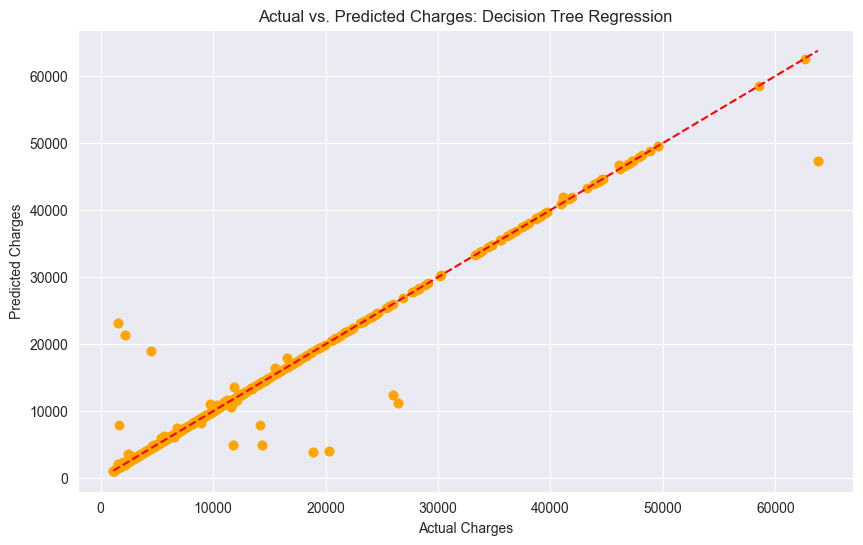

In [25]:
#Algorithm: creates a multitude of decision trees during training and outputs the mean prediction of the individual trees
#less interpretable

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Initialize and Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

#Make predictions on the Test set
dt_predictions = dt_model.predict(X_test) #these will be compared to y_test values 

#Compute the Mean Square Error (MSE) of the Decision Tree Regressor model
dt_mse = mean_squared_error(y_test, dt_predictions)
print("Mean Squared Error (Decision Tree):", dt_mse)

#Plot Actual vs Predicted Charges using Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges: Decision Tree Regression')
plt.show()
